In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
df=pd.read_csv('medical_examination.csv')
df['overweight']=df.apply(lambda x: 1 if x['weight']/(x['height']*0.01)**2>25 else 0, axis=1)
data=df
data['choles_Normal']=data.apply(lambda x: 0 if(x['cholesterol']<=0) else 1, axis=1)
data["gluc_Normal"]=data.apply(lambda x: 0 if(x['gluc']<=0) else 1, axis=1)
data["cardio_Normal"]=data.apply(lambda x: 0 if(x['cardio']<=0) else 1, axis=1)

print(data.columns)

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight',
       'choles_Normal', 'gluc_Normal', 'cardio_Normal'],
      dtype='object')


In [42]:
countof_zeros_card0=[]
countof_ones_card0=[]
countof_zeros_card1=[]
countof_ones_card1=[]
df_card0=data.loc[data.cardio_Normal==0]
df_card1=data.loc[data.cardio_Normal==1]
list=['active','alco','choles_Normal',"gluc_Normal","overweight","smoke"]
for i in range(len(list)):
    d=df_card0.loc[df_card0[list[i]]==0]
    d1=df_card0.loc[df_card0[list[i]]==1]
    countof_zeros_card0.append(len(d[list[i]]))
    countof_ones_card0.append(len(d1[list[i]]))

    d=df_card1.loc[df_card1[list[i]]==0]
    d1=df_card1.loc[df_card1[list[i]]==1]
    countof_zeros_card0.append(len(d[list[i]]))
    countof_ones_card1.append(len(d1[list[i]]))


In [70]:
data.keys()

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight',
       'choles_Normal', 'gluc_Normal', 'cardio_Normal'],
      dtype='object')

<AxesSubplot:>

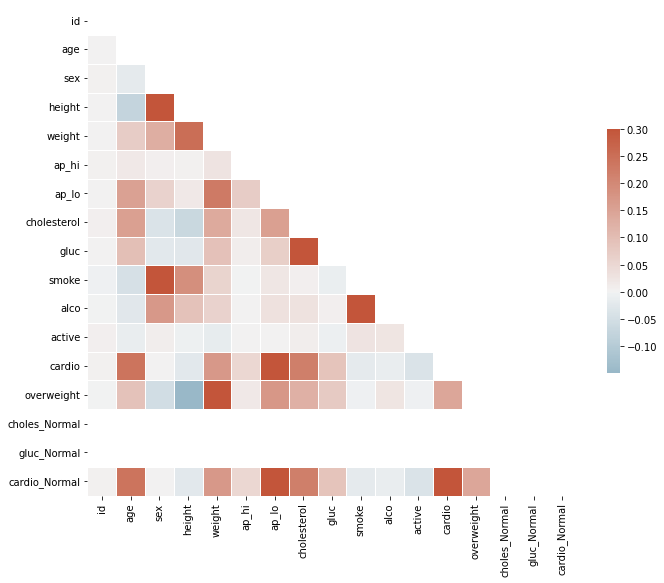

In [91]:
d1=data.loc[(data.ap_lo<=data.ap_hi) & (data.height>=data['height'].quantile(0.025)) & (data.height<=data['height'].quantile(0.975)) & (data.weight>=data['weight'].quantile(0.025)) & (data.weight<=data['weight'].quantile(0.975)),:]
corr=d1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [120]:
data.groupby(['smoke']).count()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio,overweight,choles_Normal,gluc_Normal
smoke,,,,,,,,,,,,,,,
0,63831,63831,63831,63831,63831,63831,63831,63831,63831,63831,63831,63831,63831,63831,63831
1,6169,6169,6169,6169,6169,6169,6169,6169,6169,6169,6169,6169,6169,6169,6169


In [111]:
d.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [137]:
d=pd.read_csv('fcc-forum-pageviews.csv')
d1=d.set_index('date')
d1=d.loc[(d.value>=d['value'].quantile(0.025)) & (d.value<=d['value'].quantile(0.975)),:]
d1['date'] = pd.to_datetime(d1['date'])
d1['month']= d1['date'].dt.month
d1['year']=d1['date'].dt.year
d1.head()

c:\Users\achyu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\achyu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\achyu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,date,value,month,year
10,2016-05-19,19736,5,2016
17,2016-05-26,18060,5,2016
18,2016-05-27,19997,5,2016
19,2016-05-28,19044,5,2016
20,2016-05-29,20325,5,2016


In [147]:
dfp = pd.pivot_table(data=d1, index='month', columns='year', values='value', aggfunc='sum')
dfp.head()

year,2016,2017,2018,2019
month,,,,
1,NaN,1016340.0,1815983.0,3163752.0
2,NaN,871166.0,1839012.0,2967114.0
3,NaN,910442.0,1943507.0,2827649.0
4,NaN,926362.0,1870525.0,2681053.0
5,97162.0,1061573.0,1753449.0,2834637.0
